In [1]:
import random as rd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle as pkl
from datetime import datetime, timedelta
%matplotlib widget


In [13]:
path_amag_distrib = "/home/Work/Dehorning_Analysis/PythonCodes/Joseph/Open Day Work/Ts Representation/Behavior_distribution.csv"
df_beha_distrib = pd.read_csv(path_amag_distrib, sep=",")
display(df_beha_distrib)

,behavior,not_healthy_time,not_healthy_duration_bouts,not_healthy_nb_bouts,healthy_time,healthy_duration_bouts,healthy_nb_bouts,super_healthy_time,super_healthy_duration_bouts,super_healthy_nb_bouts
0,Resting lying,806.0,10.00,80.0,543.0,30.00,18.00,374.0,60.00,7.0
1,Resting Standing,202.0,10.00,20.2,292.0,10.00,30.00,202.0,10.00,20.0
2,Playing,28.8,7.20,4.0,115.2,14.40,8.00,115.2,10.00,12.0
3,Grooming,43.2,2.16,20.0,115.2,3.84,30.00,100.8,2.00,50.0
4,Ruminating,0.0,10.00,0.0,79.2,15.00,5.28,255.6,30.00,8.5
5,Eating,57.6,5.00,26.4,129.6,11.00,24.48,244.8,15.00,16.0
6,Sniffing/exploring,172.8,5.76,30.0,144.0,7.20,20.00,144.0,5.00,30.0
7,Abnormal Behavior,115.2,7.68,15.0,14.4,3.60,4.00,0.0,0.00,0.0
8,Rising/lying-down,14.4,0.14,101.0,7.2,0.15,48.00,3.6,0.13,27.0


# Functions

In [4]:
def random_delta_passive(size : float, start_value: float, min_delta: float, max_delta: float, min_value: float, max_value: float, peak_chance:float) -> pd.DataFrame:
    """
    Generates a random delta for the passive behaviours ==> No big changes in Amag

    Args:
        size (float): the number of datapoints created
        start_value (float): the starting value of the Amag
        min_delta (float): the minimum delta that can be generated
        max_delta (float): the maximum delta that can be generated
        min_value (float): the minimum value that can be generated
        max_value (float): the maximum value that can be generated
        precision (int, optional): the precision of the data generated. Defaults to 1 => 1 decimal floats

    Returns:
        df (DataFrame): DataFrame containing the Amag and the DateTime
    """
    all_updated_values = []
    value_range = max_delta - min_delta
    half_range = value_range / 2
    for _ in range(size):
        if rd.random() < peak_chance : # peak chance% chance of generating the max_value or the min_value
            peak = abs(4*max_value*rd.random())
            all_updated_values.append(peak)
            continue
        else : #no peak
            delta = rd.random()*value_range - half_range
            updated_value = start_value + delta
            
            if updated_value < min_value : # Amag can'size be smaller than the min_value
                if min_value == 0 :
                    updated_value = abs(start_value - delta)
                else :
                    updated_value = start_value - delta
                    
            elif updated_value > max_value :
                updated_value = max_value - (updated_value - max_value)
            
            all_updated_values.append(updated_value)
            start_value = updated_value
    
    date_begin = pd.Timestamp(2023, 1, 1, 0, 0, 0)
    date_from_size = [date_begin + timedelta(days = i/size) for i in range(size)]
    df = pd.DataFrame({'Amag': all_updated_values, 'DateTime': date_from_size})
    return df
        

def random_delta_active(size : float, start_value: float, min_delta: float, max_delta: float, min_value: float, max_value: float,peak_chance :float) -> pd.DataFrame:
    """
    Generates a random delta for the active behaviours ==> Big changes in Amag,
    adds a possibility of the Ama to be generated is the max_value or the min_value

    Args:
        size (float): the number of datapoints created
        start_value (float): the starting value of the Amag
        min_delta (float): the minimum delta that can be generated
        max_delta (float): the maximum delta that can be generated
        min_value (float): the minimum value that can be generated
        max_value (float): the maximum value that can be generated
        precision (int, optional): the precision of the data generated. Defaults to 1 => 1 decimal floats

    Returns:
        df (DataFrame): DataFrame containing the Amag and the DateTime
    """
    all_updated_values = []
    value_range = max_delta - min_delta
    half_range = int(value_range / 2)
    for _ in range(size):
        if rd.random() < peak_chance : # 5% chance of generating the max_value or the min_value
            updated_value = rd.choice([ min_value*rd.random(), max_value*rd.random()])
        else :
            delta = rd.random()*value_range - half_range
            updated_value = start_value + delta
        
        all_updated_values.append(updated_value)
    
        if updated_value < min_value : # Amag can'size be smaller than the min_value
            updated_value = start_value - delta
        elif updated_value > max_value :
            updated_value = max_value - (updated_value - max_value)
        
        start_value = updated_value
    
    date_begin = pd.Timestamp(2023, 1, 1, 0, 0, 0)
    date_from_size = [date_begin + timedelta(days = i/size) for i in range(size)]
    df = pd.DataFrame({'Amag': all_updated_values, 'DateTime': date_from_size})
    return df


def generate_abnormal(size : float) -> pd.DataFrame:
    """
    Generates a random delta for the active behaviours ==> Big changes in Amag,
    adds a possibility of the Ama to be generated is the max_value or the min_value

    Args:
        size (float): the number of datapoints created

    Returns:
        df (DataFrame): DataFrame containing the Amag and the DateTime
    """
    all_updated_values = []
    for _ in range(size):
        if rd.random() < 0.1 : 
            all_updated_values.append(rd.random()*4)
        else :
            all_updated_values.append(0)
            
    date_begin = pd.Timestamp(2023, 1, 1, 0, 0, 0)
    date_from_size = [date_begin + timedelta(days = i/size) for i in range(size)]
    df = pd.DataFrame({'Amag': all_updated_values, 'DateTime': date_from_size})
    return df


def generate_grooming (size : int) -> pd.DataFrame:

    # sr = 25 # sampling rate
    # size = np.arange(0, 24*3600, 1/sr)
    noise = np.random.normal(-0.05,0.05,size)

    f1 = 0.001
    f2= 2
    f3 = 3

    amplitude = 0.5

    sin1 = amplitude * np.sin(2 * np.pi * f1 * size) + noise
    # print(sin1)
    sin2 = amplitude * np.sin(2 * np.pi * f1 * size) + amplitude * np.sin(2 * np.pi * f2* size) + noise
    # print(sin2)
    sin3 = amplitude * np.sin(2 * np.pi * f1 * size) + amplitude * np.sin(2 * np.pi * f2* size) + amplitude * np.sin(2 * np.pi * f3* size) + noise
    # print(sin3)
    all_updated_values = sin1 + sin2 + sin3
    
    date_begin = pd.Timestamp(2023, 1, 1, 0, 0, 0)
    date_from_size = [date_begin + timedelta(days = i/size) for i in range(size)]
    df = pd.DataFrame({'Amag': all_updated_values, 'DateTime': date_from_size})
    return df


def get_nb_datapoints_from_time (time, time_step=12):
    return int(time*time_step)


def filter_behaviour_and_get_color (behavior_grouping : dict, current_behaviour : str) :
    """
    Filter the dataframe to only keep the behaviours we want to analyse and get the color associated 
    to each behaviour for plotting
    
    Args:
        behavior_grouping (dict): dictionary containing the behaviours we want to analyse (and their grouping) 
    and the color associated to each behaviour. Must have a structure like this :
    {'behaviour1' : {'group' : 'group1', 'color' : 'color1'}, 'behaviour2' : {'group' : 'group2', 'color' : 'color2'}, ...}
        current_behaviour (str): current behaviour we are analysing
    
    Returns:
        color (str) : color associated to the current_behaviour 
        label (str) : filtered label associated with the current behaviour
        
    Comments:
        E.g. : color, label = filter_behaviour_and_get_color (behavior_groups, 'walking')
    """

    for key, value in behavior_grouping.items() :
        if current_behaviour == key :
            color = value['color']
            label = key
            return color, label
        else :
            if current_behaviour in behavior_grouping[key]['group'] :
                color = value['color']
                label = key
                return color, label
                
    return "Behavior not in the dictionary ..."


def get_random_date (start_date : pd.Timestamp, end_date : pd.Timestamp) :
    return start_date + timedelta(seconds=rd.randint(0, int((end_date - start_date).total_seconds())))


def get_values_from_rd_date (df : pd.DataFrame, start_date : pd.Timestamp, behavior_diration : pd.Timedelta) -> pd.DataFrame :
    """
    Get the values of the Amag for the given behaviour duration

    Args:
        df (pd.DataFrame): DataFrame containing the Amag and the DateTime
        start_date (pd.Timestamp): start date of the behaviour
        behavior_diration (pd.Timedelta): duration of the behaviour

    Returns:
        pd.DataFrame: DataFrame containing the Amag and the DateTime for the given behaviour duration
    """
    end_date = start_date + behavior_diration
    df = df[(df['DateTime'] >= start_date) & (df['DateTime'] <= end_date)]
    return df


def shuffle_data_by_blocks (data : list, blocksize : int) :

    # Create blocks
    blocks = [data[i:i+blocksize] for i in range(0,len(data),blocksize)]
    
    # shuffle the blocks
    rd.shuffle(blocks)
    
    # concatenate the shuffled blocks
    data[:] = [b for bs in blocks for b in bs]

    return data

In [5]:
print(get_random_date(pd.Timestamp(2023, 1, 1, 0, 0, 0), pd.Timestamp(2023, 1, 1, 0, 0, 0) + timedelta(days=1)))
print(generate_grooming(5))

print(get_values_from_rd_date(generate_grooming(100), pd.Timestamp(2023, 1, 1, 0, 0, 0), timedelta(minutes = 100)))

2023-01-01 14:14:25
       Amag            DateTime
0 -0.268528 2023-01-01 00:00:00
1 -0.236685 2023-01-01 04:48:00
2 -0.060811 2023-01-01 09:36:00
3  0.304784 2023-01-01 14:24:00
4 -0.322039 2023-01-01 19:12:00
       Amag            DateTime
0  0.477715 2023-01-01 00:00:00
1  0.871386 2023-01-01 00:14:24
2  0.935941 2023-01-01 00:28:48
3  0.783110 2023-01-01 00:43:12
4  0.699275 2023-01-01 00:57:36
5  0.769206 2023-01-01 01:12:00
6  0.523155 2023-01-01 01:26:24


# Behavior repartition over time

In [7]:
list_beha_not_healthy = []
list_beha_healthy = []
list_beha_super_healthy = []

for i in range(len(df_beha_distrib)-1):
    list_beha_not_healthy.extend([df_beha_distrib["behavior"][i] ]* round(df_beha_distrib["not_healthy_nb_bouts"][i]))
    list_beha_healthy.extend([df_beha_distrib["behavior"][i] ]* round(df_beha_distrib["healthy_nb_bouts"][i]))
    list_beha_super_healthy.extend([df_beha_distrib["behavior"][i] ]* round(df_beha_distrib["super_healthy_nb_bouts"][i]))
    
# print(list_beha_not_healthy)
# print(list_beha_healthy)
# print(list_beha_super_healthy)

#shuffle everything
list_beha_not_healthy_shuffled = shuffle_data_by_blocks(list_beha_not_healthy, 1)
list_beha_healthy_shuffled = shuffle_data_by_blocks(list_beha_healthy, 1)
list_beha_super_healthy_shuffled = shuffle_data_by_blocks(list_beha_super_healthy, 1)

print(list_beha_not_healthy_shuffled)
print(len(list_beha_not_healthy_shuffled))
print(len(list_beha_healthy_shuffled))
print(len(list_beha_super_healthy_shuffled))


['Resting lying', 'Eating', 'Abnormal Behavior', 'Grooming', 'Abnormal Behavior', 'Resting lying', 'Resting lying', 'Resting Standing', 'Resting lying', 'Sniffing/exploring', 'Eating', 'Eating', 'Resting lying', 'Eating', 'Eating', 'Sniffing/exploring', 'Eating', 'Abnormal Behavior', 'Grooming', 'Grooming', 'Resting Standing', 'Resting Standing', 'Resting lying', 'Resting Standing', 'Resting lying', 'Eating', 'Abnormal Behavior', 'Eating', 'Sniffing/exploring', 'Sniffing/exploring', 'Grooming', 'Resting lying', 'Resting lying', 'Resting Standing', 'Resting lying', 'Eating', 'Abnormal Behavior', 'Abnormal Behavior', 'Resting Standing', 'Resting lying', 'Resting Standing', 'Resting lying', 'Resting lying', 'Resting lying', 'Resting lying', 'Grooming', 'Resting lying', 'Resting lying', 'Resting lying', 'Playing', 'Sniffing/exploring', 'Resting Standing', 'Abnormal Behavior', 'Resting lying', 'Resting lying', 'Resting lying', 'Resting lying', 'Resting Standing', 'Eating', 'Sniffing/explori

In [ ]:
# beha_color = {"lying" : "#8e44ad", "lying" : "#2ecc71", "standing" : "#f1c40f", "walking" : "#3498db", "play" : "#e74c3c", "other" : "#0F6C7B"} # "rising" : "#f39c12"

# all_beha_simu = y_values_eating + y_values_ruminating + y_values_grooming + y_values_playing + y_values_resting_standing + y_values_resting_lying
# x_values = [i for i in range(len(all_beha_simu))]
# df_all_beha_simu = pd.DataFrame({"Amag" : all_beha_simu, "DateTime" : x_values, "label" : ["eating"]*len(y_values_eating) + ["ruminating"]*len(y_values_ruminating) + \
#     ["grooming"]*len(y_values_grooming) + ["playing"]*len(y_values_playing) + ["resting standing"]*len(y_values_resting_standing) + ["resting lying"]*len(y_values_resting_lying)})
# labels = ["eating"*len(y_values_eating), "ruminating"*len(y_values_ruminating), "grooming"*len(y_values_grooming), "playing"*len(y_values_playing), "resting standing"*len(y_values_resting_standing), "resting lying"*len(y_values_resting_lying)]
# display(df_all_beha_simu)

# plt.plot(x_values, all_beha_simu)

# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())
    
# plt.ylim(0, 2)
# plt.show()
# # all_beha_simu = y_values_eating + y_values_ruminating + y_values_grooming + y_values_playing + y_values_resting_standing + y_values_resting_lying

# plt.ylim(0, 2)
# plt.plot(x_values, shuffle_data_by_blocks(all_beha_simu, 2000))
# plt.show()

# Stitching everything together

In [36]:
size = 100000

#all the y_values
y_values_sniffing = random_delta_active(size, start_value= 0.0, min_delta=-0.008, max_delta= 0.008, min_value=0, max_value=1, peak_chance=0.05)
y_values_eating = random_delta_passive(size, start_value= 0.0, min_delta=-0.008, max_delta= 0.008, min_value=0, max_value=0.25,peak_chance=0.02)
y_values_ruminating = random_delta_passive(size, start_value= 0.1, min_delta=-0.01, max_delta= 0.01, min_value=0.0, max_value=0.15, peak_chance=0.005)
y_values_grooming = generate_grooming(size)
y_values_playing = random_delta_active(size, start_value= 0.1, min_delta=-0.01, max_delta= 0.01, min_value=0.1, max_value=2,peak_chance=0.05)
y_values_resting_standing = random_delta_passive(size, start_value= 0.0, min_delta=-0.001, max_delta= 0.001, min_value=0.0, max_value=0.05, peak_chance=0.004)
y_values_abnormal = generate_abnormal(size)
y_values_resting_lying = random_delta_passive(size, start_value= 0.0, min_delta=-0.001, max_delta= 0.001, min_value=0.0, max_value=0.05, peak_chance=0.002)


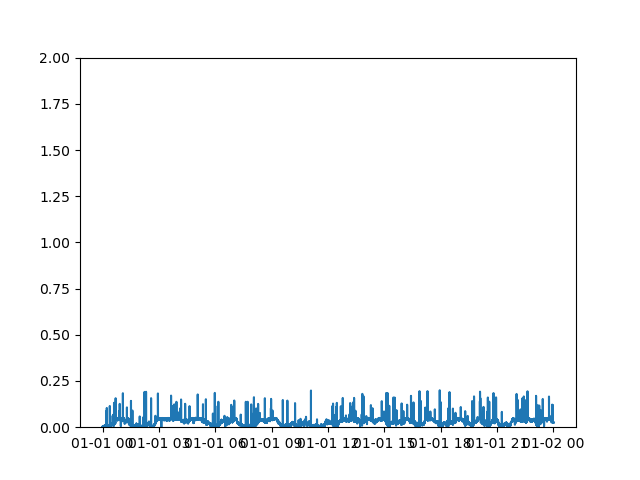

In [37]:
plt.close('all')
plt.ylim(0, 2)
plt.plot(y_values_resting_lying["DateTime"], y_values_resting_lying["Amag"])


In [38]:
plot_correspondance = {"Eating" : y_values_eating, "Ruminating" : y_values_ruminating, "Grooming" : y_values_grooming,
                       "Playing" : y_values_playing, "Resting Standing" : y_values_resting_standing, "Resting lying" : y_values_resting_lying,
                       "Abnormal Behavior" : y_values_abnormal, "Sniffing/exploring" : y_values_sniffing}

#['Resting lying' 'Resting Standing' 'Playing' 'Grooming' 'Ruminating' 'Eating' 'Sniffing/exploring' 'Abnormal Behavior' 'Rising/lying-down']

behavior_groups = {'Resting lying' : {"group":[], "color" : "plum"},
                 'Resting Standing': {"group" : [], "color" : "lightcoral"}, 
                 'Sniffing/exploring': {"group" : [], "color" : "#00194C"},
                 'Ruminating': {"group" : [], "color" : "#7ABC32"}, 
                 'Grooming': {"group" : [], "color" : "#64e2a2"}, 
                 'Playing': {"group" : [], "color" : "#12A1C8"}, 
                 'Abnormal Behavior': {"group" : [], "color" : "#E7E6E6"},
                 'Eating': {"group" : [], "color" : "#0F6C7B"},
                 'Rising/lying-down': {"group" : [], "color" : "#808080"}
                }

# For the not healthy calves

In [76]:
#for the not healthy calves

x_axis_start = pd.to_datetime("2023-01-01 00:00:00")
list_date = []
list_amag = []
list_behavior = []
list_color = []

for behaviors_ in list_beha_not_healthy_shuffled[:] :
    time_beha = timedelta(minutes = float(df_beha_distrib.loc[df_beha_distrib["behavior"] == behaviors_, "not_healthy_duration_bouts"].values[0]))
    start_values_date = get_random_date(pd.Timestamp(2023, 1, 1, 0, 0, 0), pd.Timestamp(2023, 1, 1, 0, 0, 0) + timedelta(days=1) - time_beha)
    
    try :
        curr_color, curr_label = filter_behaviour_and_get_color(behavior_grouping = behavior_groups, current_behaviour= behaviors_)
        # print(curr_color, curr_label)
    except ValueError :
        print(f"Behavior {behaviors_} not in the behavior groups dictionary ...")
        raise ValueError
    
    plot_y_data = get_values_from_rd_date(plot_correspondance[curr_label], start_values_date, time_beha)
    x_axis = pd.date_range(x_axis_start,x_axis_start+time_beha,len(plot_y_data)).tolist()
    y_axis = plot_y_data["Amag"]#.rolling(5).mean()

    x_axis_start = x_axis_start + time_beha
    
    #constructing the final dataframe
    list_date.extend(x_axis)
    list_amag.extend(y_axis)
    list_behavior.extend([curr_label]*len(x_axis))
    list_color.extend([curr_color]*len(x_axis))
    
final_dataframe_not_healthy = pd.DataFrame({"DateTime" : list_date, "Amag" : list_amag, "label" : list_behavior, "color" :list_color})
final_dataframe_not_healthy["Amag"] = final_dataframe_not_healthy["Amag"].rolling(5).mean()
final_dataframe_not_healthy = final_dataframe_not_healthy.dropna()
final_dataframe_not_healthy.to_csv("/home/Work/Dehorning_Analysis/PythonCodes/Joseph/Open Day Work/Ts Representation/Amag_distribution_not_healthy.csv", index=False)

In [77]:
display(final_dataframe_not_healthy.head())


,DateTime,Amag,label,color
4,2023-01-01 00:00:03.458213256,0.042677,Resting lying,plum
5,2023-01-01 00:00:04.322766570,0.042773,Resting lying,plum
6,2023-01-01 00:00:05.187319884,0.042847,Resting lying,plum
7,2023-01-01 00:00:06.051873198,0.042925,Resting lying,plum
8,2023-01-01 00:00:06.916426512,0.043049,Resting lying,plum


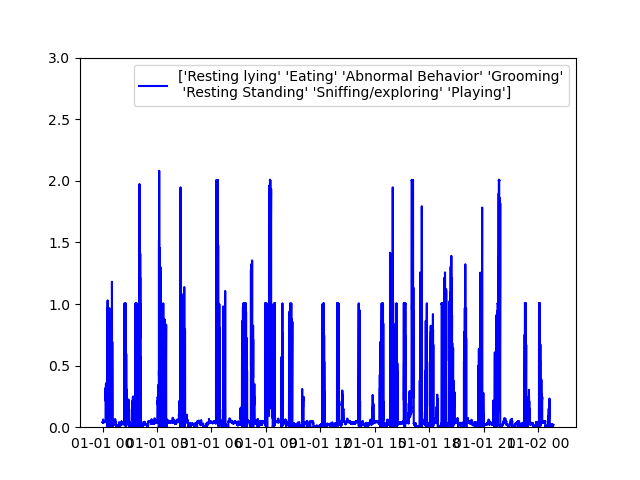

In [78]:
plt.close('all')

# for label_ in final_dataframe_not_healthy["label"].unique() :
#     plt.plot(final_dataframe_not_healthy[final_dataframe_not_healthy["label"] == label_]["DateTime"], 
#              final_dataframe_not_healthy[final_dataframe_not_healthy["label"] == label_]["Amag"], 
#              color = final_dataframe_not_healthy[final_dataframe_not_healthy["label"] == label_]["color"].unique()[0] ,
#              label = label_)

plt.plot(final_dataframe_not_healthy["DateTime"], final_dataframe_not_healthy["Amag"], color = "blue" ,label = final_dataframe_not_healthy["label"].unique())
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())
plt.legend(by_label.values(), by_label.keys(), loc='upper right')
plt.ylim(0, 3)
plt.show()

# For the healthy calves

In [82]:
#for the healthy calves

x_axis_start = pd.to_datetime("2023-01-01 00:00:00")
list_date = []
list_amag = []
list_behavior = []
list_color = []

for behaviors_ in list_beha_healthy_shuffled[:] :
    time_beha = timedelta(minutes = float(df_beha_distrib.loc[df_beha_distrib["behavior"] == behaviors_, "healthy_duration_bouts"].values[0]))
    start_values_date = get_random_date(pd.Timestamp(2023, 1, 1, 0, 0, 0), pd.Timestamp(2023, 1, 1, 0, 0, 0) + timedelta(days=1) - time_beha)
    
    try :
        curr_color, curr_label = filter_behaviour_and_get_color(behavior_grouping = behavior_groups, current_behaviour= behaviors_)
        # print(curr_color, curr_label)
    except ValueError :
        print(f"Behavior {behaviors_} not in the behavior groups dictionary ...")
        raise ValueError
    
    plot_y_data = get_values_from_rd_date(plot_correspondance[curr_label], start_values_date, time_beha)
    x_axis = pd.date_range(x_axis_start,x_axis_start+time_beha,len(plot_y_data)).tolist()
    y_axis = plot_y_data["Amag"]#.rolling(5).mean()

    x_axis_start = x_axis_start + time_beha
    
    #constructing the final dataframe
    list_date.extend(x_axis)
    list_amag.extend(y_axis)
    list_behavior.extend([curr_label]*len(x_axis))
    list_color.extend([curr_color]*len(x_axis))
    
final_dataframe_healthy = pd.DataFrame({"DateTime" : list_date, "Amag" : list_amag, "label" : list_behavior, "color" :list_color})
final_dataframe_healthy["Amag"] = final_dataframe_healthy["Amag"].rolling(5).mean()
final_dataframe_healthy = final_dataframe_healthy.dropna()
final_dataframe_healthy.to_csv("/home/Work/Dehorning_Analysis/PythonCodes/Joseph/Open Day Work/Ts Representation/Amag_distribution_healthy.csv", index=False)

In [83]:
display(final_dataframe_healthy.head())


,DateTime,Amag,label,color
4,2023-01-01 00:00:03.477735849,-0.118384,Grooming,#64e2a2
5,2023-01-01 00:00:04.347169811,-0.132804,Grooming,#64e2a2
6,2023-01-01 00:00:05.216603773,-0.172676,Grooming,#64e2a2
7,2023-01-01 00:00:06.086037735,-0.156909,Grooming,#64e2a2
8,2023-01-01 00:00:06.955471698,-0.144711,Grooming,#64e2a2


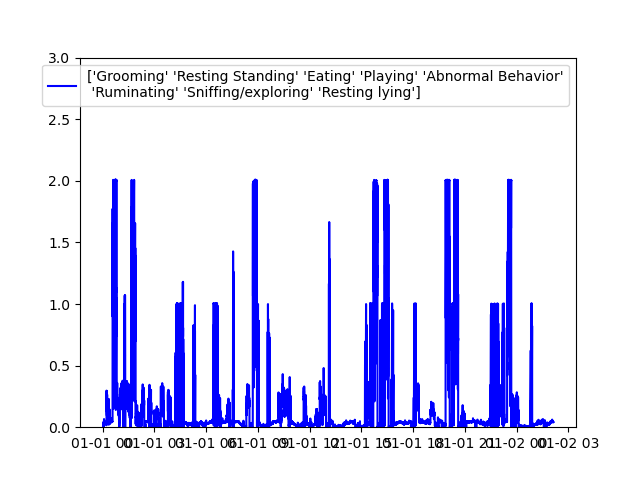

In [84]:
plt.close('all')

# for label_ in final_dataframe_not_healthy["label"].unique() :
#     plt.plot(final_dataframe_healthy[final_dataframe_healthy["label"] == label_]["DateTime"], 
#              final_dataframe_healthy[final_dataframe_healthy["label"] == label_]["Amag"], 
#              color = final_dataframe_healthy[final_dataframe_healthy["label"] == label_]["color"].unique()[0] ,
#              label = label_)

plt.plot(final_dataframe_healthy["DateTime"], final_dataframe_healthy["Amag"], color = "blue" ,label = final_dataframe_healthy["label"].unique())
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())
plt.legend(by_label.values(), by_label.keys(), loc='upper right')
plt.ylim(0, 3)
plt.show()

# For the super healthy calves

In [85]:
#for the super healthy calves

x_axis_start = pd.to_datetime("2023-01-01 00:00:00")
list_date = []
list_amag = []
list_behavior = []
list_color = []

for behaviors_ in list_beha_super_healthy_shuffled[:] :
    time_beha = timedelta(minutes = float(df_beha_distrib.loc[df_beha_distrib["behavior"] == behaviors_, "super_healthy_duration_bouts"].values[0]))
    start_values_date = get_random_date(pd.Timestamp(2023, 1, 1, 0, 0, 0), pd.Timestamp(2023, 1, 1, 0, 0, 0) + timedelta(days=1) - time_beha)
    
    try :
        curr_color, curr_label = filter_behaviour_and_get_color(behavior_grouping = behavior_groups, current_behaviour= behaviors_)
        # print(curr_color, curr_label)
    except ValueError :
        print(f"Behavior {behaviors_} not in the behavior groups dictionary ...")
        raise ValueError
    
    plot_y_data = get_values_from_rd_date(plot_correspondance[curr_label], start_values_date, time_beha)
    x_axis = pd.date_range(x_axis_start,x_axis_start+time_beha,len(plot_y_data)).tolist()
    y_axis = plot_y_data["Amag"]#.rolling(5).mean()

    x_axis_start = x_axis_start + time_beha
    
    #constructing the final dataframe
    list_date.extend(x_axis)
    list_amag.extend(y_axis)
    list_behavior.extend([curr_label]*len(x_axis))
    list_color.extend([curr_color]*len(x_axis))
    
final_dataframe_super_healthy = pd.DataFrame({"DateTime" : list_date, "Amag" : list_amag, "label" : list_behavior, "color" :list_color})
final_dataframe_super_healthy["Amag"] = final_dataframe_super_healthy["Amag"].rolling(5).mean()
final_dataframe_super_healthy = final_dataframe_super_healthy.dropna()
final_dataframe_super_healthy.to_csv("/home/Work/Dehorning_Analysis/PythonCodes/Joseph/Open Day Work/Ts Representation/Amag_distribution_super_healthy.csv", index=False)

In [86]:
display(final_dataframe_super_healthy.head())

,DateTime,Amag,label,color
4,2023-01-01 00:00:03.458213256,0.111272,Eating,#0F6C7B
5,2023-01-01 00:00:04.322766570,0.112708,Eating,#0F6C7B
6,2023-01-01 00:00:05.187319884,0.112108,Eating,#0F6C7B
7,2023-01-01 00:00:06.051873198,0.111723,Eating,#0F6C7B
8,2023-01-01 00:00:06.916426512,0.109981,Eating,#0F6C7B


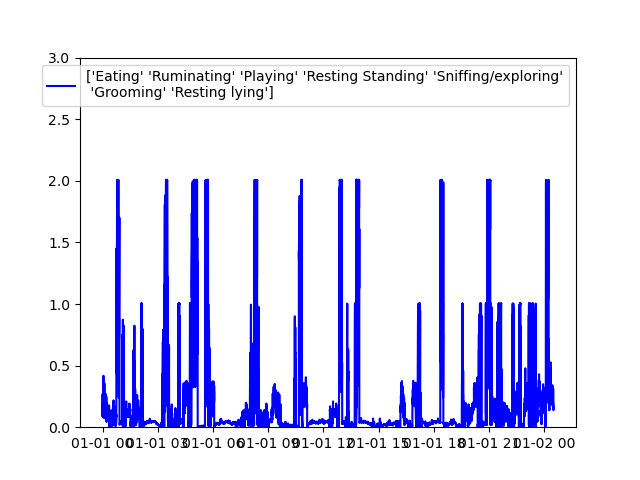

In [90]:
plt.close('all')

# for label_ in final_dataframe_super_healthy["label"].unique() :
#     plt.plot(final_dataframe_super_healthy[final_dataframe_super_healthy["label"] == label_]["DateTime"], 
#              final_dataframe_super_healthy[final_dataframe_super_healthy["label"] == label_]["Amag"], 
#              color = final_dataframe_super_healthy[final_dataframe_super_healthy["label"] == label_]["color"].unique()[0] ,
#              label = label_)

plt.plot(final_dataframe_super_healthy["DateTime"], final_dataframe_super_healthy["Amag"], color = "blue" ,label = final_dataframe_super_healthy["label"].unique())
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())
plt.legend(by_label.values(), by_label.keys(), loc='upper right')
plt.ylim(0, 3)
plt.show()